## Loading data

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from google.colab import drive

drive.mount('/content/drive')


files_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/"
filename = files_dir + "AB_NYC_2019.csv"

df = pd.read_csv(filename) 


Mounted at /content/drive


## Cleaning Data

In [3]:
# before moving forward there are a few 
# features that could use better names
df.rename(columns=
            {"id": "listing_id", 
             "name": "listing_title",
             "host_name":"host_first_name",
             "neighbourhood_group":"nyc_borough",
             "room_type": "property_type",
             "last_review": "last_review_date"
            },
          inplace=True)

df

,listing_id,listing_title,host_id,host_first_name,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Now let's remove duplicates and rows that make little sense


In [4]:
# checking for duplicates
print(df.duplicated().any())
print(df.duplicated(subset=['listing_id']).any())

False
False


Now let's check for NAs

In [5]:
display(df.isnull().sum())
display(df.query('reviews_per_month != reviews_per_month'))

# we don't care about titles and first names
# 10,052 listings had no reviews which 
# resulted in NaN values in  
# reviews_per_month columns
# we just need to fill those out with zeros

df_clean = df.fillna({
    'reviews_per_month':0
    })

# we will deal with last review date later

listing_id                            0
listing_title                        16
host_id                               0
host_first_name                      21
nyc_borough                           0
neighbourhood                         0
latitude                              0
longitude                             0
property_type                         0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review_date                  10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

,listing_id,listing_title,host_id,host_first_name,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
df_clean.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We probably want to look at rows where:
- price = 0
- long term renting (minimun_nights > 30)
- reviews_per_month > 30
- availability_365 = 0

In [7]:
display(df_clean.query('price == 0'))

# we got 11 rows
# 0 price makes no sense and since 
# we will be trying to predict the price
# we should probably delete those

df_clean = df_clean.query('price > 0')


,listing_id,listing_title,host_id,host_first_name,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [8]:
display(df_clean.query('minimum_nights > 11'))

# 747 rows 
# I would either remove those
# or add a new binary feature "long-term renting"
# since conditions for long-term renting could 
# be different and this could confuse our model
# 11 btw is IRQ upper fence
# we'll do it in the next section





,listing_id,listing_title,host_id,host_first_name,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
29,9657,Modern 1 BR / NYC / EAST VILLAGE,21904,Dana,Manhattan,East Village,40.72920,-73.98542,Entire home/apt,180,14,29,2019-04-19,0.24,1,67
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,0.00,1,365
45,12627,Entire apartment in central Brooklyn neighborh...,49670,Rana,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,Entire home/apt,150,29,11,2019-06-05,0.49,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48810,36445121,UWS Spacious Master Bedroom Sublet,274014453,Dagmara,Manhattan,Upper West Side,40.79952,-73.96003,Private room,75,30,0,NaN,0.00,1,90
48843,36453642,"☆ HUGE, SUNLIT Room - 3 min walk from Train !",53966115,Nora,Brooklyn,Bedford-Stuyvesant,40.69635,-73.93743,Private room,45,29,0,NaN,0.00,2,341
48871,36475746,A LARGE ROOM - 1 MONTH MINIMUM - WASHER&DRYER,144008701,Ozzy Ciao,Manhattan,Harlem,40.82233,-73.94687,Private room,35,29,0,NaN,0.00,2,31
48879,36480292,Gorgeous 1.5 Bdr with a private yard- Williams...,540335,Lee,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,NaN,0.00,1,22


In [9]:
display(df_clean.query('reviews_per_month > 30'))

# even if we assume the property is booked for 1 night every night, 
# 58.5 reviews per months appears implausible 
# (as far as I know only guests can leave reviews, 
# so even if I ask my friends to join me in tanking the 
# rating of the property, airbnb won't allow that) 

df_clean = df_clean.query('reviews_per_month < 31')

,listing_id,listing_title,host_id,host_first_name,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299


In [10]:
display(df_clean.query('availability_365 == 0'))

# 12,686 rows that's about the quarter of our datapoints
# 0 availability could mean that the owner did not want to
# delist the property but it was temporarily unavailable
# e.g. due to renovations.
# I don't think availability has any effect on the price
# which we try to predict, so we can just remove that feature
# but keep the rows 

,listing_id,listing_title,host_id,host_first_name,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,0.00,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,0.00,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,0.00,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,0.00,1,0


So let's remove columns we won't need

In [11]:
df_clean.drop([
        "listing_id", # listing id does not give us any valuable information
        "listing_title", # listing title could potentially be analyzed for key words, but not in this PA
        "host_id", # host id and host name do not give us any valuable information
        "host_first_name",
        #"latitude", # for location, we're going to use boroughs and neighbourhoods 
        #"longitude",# so lat and long can go
        'availability_365'], # explained above
        axis=1, 
        inplace=True
        )

display(df_clean)
display(df_clean.shape)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,nyc_borough,neighbourhood,latitude,longitude,property_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6


(48883, 11)

## Feature Engineering

In [13]:
# adding long term rent feature
df_clean['long_term_rent'] = (df_clean['minimum_nights'] > 11).astype(int)

# adding months on market column
# df_clean['months_on_market'] = df_clean['number_of_reviews'] / df_clean['reviews_per_month']


### One-hot encoding

In [14]:
# property type
display(df_clean.property_type.unique())

# since these are going to be column names
# we need to lowercase them and remove spaces
df_clean['property_type'] = (df_clean['property_type']
                                  .str.lower()
                                  .replace(' ', '_', regex=True)
                            )

df_clean = pd.get_dummies(df_clean, prefix=['type'], columns=['property_type'])
display(df_clean)

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

,nyc_borough,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,long_term_rent,type_entire_home/apt,type_private_room,type_shared_room
0,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,0,0,1,0
1,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,0,1,0,0
2,Manhattan,Harlem,40.80902,-73.94190,150,3,0,NaN,0.00,1,0,0,1,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,0,1,0,0
4,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaN,0.00,2,0,0,1,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,40,4,0,NaN,0.00,2,0,0,1,0
48892,Manhattan,Harlem,40.81475,-73.94867,115,10,0,NaN,0.00,1,0,1,0,0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaN,0.00,6,0,0,0,1


In [15]:
# neighbourhoods

display(df_clean.nyc_borough.unique())

# since these are going to be column names
# we need to lowercase them and remove spaces
df_clean['neighbourhood'] = (df_clean['neighbourhood']
                                  .str.lower()
                                  #.replace('.', ' ', regex=True)
                                  .replace(' ', '_', regex=True)
                            )

df_clean = pd.get_dummies(df_clean, prefix=['neighbourhood'], columns=['neighbourhood'])

display(df_clean)

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

,nyc_borough,latitude,longitude,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,long_term_rent,...,neighbourhood_westerleigh,neighbourhood_whitestone,neighbourhood_williamsbridge,neighbourhood_williamsburg,neighbourhood_willowbrook,neighbourhood_windsor_terrace,neighbourhood_woodhaven,neighbourhood_woodlawn,neighbourhood_woodrow,neighbourhood_woodside
0,Brooklyn,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,0,...,0,0,0,0,0,0,0,0,0,0
1,Manhattan,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,0,...,0,0,0,0,0,0,0,0,0,0
2,Manhattan,40.80902,-73.94190,150,3,0,NaN,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Brooklyn,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Manhattan,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,70,2,0,NaN,0.00,2,0,...,0,0,0,0,0,0,0,0,0,0
48891,Brooklyn,40.70184,-73.93317,40,4,0,NaN,0.00,2,0,...,0,0,0,0,0,0,0,0,0,0
48892,Manhattan,40.81475,-73.94867,115,10,0,NaN,0.00,1,0,...,0,0,0,0,0,0,0,0,0,0
48893,Manhattan,40.75751,-73.99112,55,1,0,NaN,0.00,6,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# nyc_borough
# I'm not sure if having boroughs helps us
# since usually the more granular
# the data is the better and we have neoghbourhood
# will keep boroughs for now

display(df_clean.nyc_borough.unique())

# since these are going to be column names
# we need to lowercase them and remove spaces
df_clean['nyc_borough'] = (df_clean['nyc_borough']
                                      .str.lower()
                                      .replace(' ', '_', regex=True)
                          )

df_clean = pd.get_dummies(df_clean, prefix=['borough'], columns=['nyc_borough'])
display(df_clean)

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,calculated_host_listings_count,long_term_rent,type_entire_home/apt,...,neighbourhood_windsor_terrace,neighbourhood_woodhaven,neighbourhood_woodlawn,neighbourhood_woodrow,neighbourhood_woodside,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,0,0,...,0,0,0,0,0,0,1,0,0,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,0,1,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,NaN,0.00,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,0.00,2,0,0,...,0,0,0,0,0,0,1,0,0,0
48891,40.70184,-73.93317,40,4,0,NaN,0.00,2,0,0,...,0,0,0,0,0,0,1,0,0,0
48892,40.81475,-73.94867,115,10,0,NaN,0.00,1,0,1,...,0,0,0,0,0,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,NaN,0.00,6,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# last_review_date

# originally I wanted to generate days since last review
# feature, but I would work poorly with NAs
# so perhaps we can add a few features indicating 
# whether last review was within last 6 and 12 months

# since we do not know when the dataset was created
# we will count from the latest available date 

df_clean['last_review_date'] = pd.to_datetime(df_clean['last_review_date']).dt.date

max_date = max(df_clean['last_review_date'])

df_clean['reviewed_in_last_6_months'] = \
  df_clean.last_review_date.between(max_date - pd.DateOffset(months=6), max_date).astype(int)

df_clean['reviewed_in_last_12_months'] = \
  df_clean.last_review_date.between(max_date - pd.DateOffset(months=6), max_date).astype(int)


print(df_clean[['last_review_date','reviewed_in_last_6_months', 'reviewed_in_last_12_months']])

# and now we can remove last_review_date
df_clean.drop(labels=['last_review_date'], inplace=True, axis=1)


      last_review_date  reviewed_in_last_6_months  reviewed_in_last_12_months
0           2018-10-19                          0                           0
1           2019-05-21                          1                           1
2                  NaT                          0                           0
3           2019-07-05                          1                           1
4           2018-11-19                          0                           0
...                ...                        ...                         ...
48890              NaN                          0                           0
48891              NaN                          0                           0
48892              NaN                          0                           0
48893              NaN                          0                           0
48894              NaN                          0                           0

[48883 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [18]:
# finally, we will create categories for our target label

df_clean['price'].describe()

#bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 10000]
#labels=['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', 'over 500']

bins=[0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 10000]
labels=['<50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', 'over 1k']

df_clean['price_category'] = pd.cut(
    df_clean.price, 
    bins=bins,
    labels=labels
    )

In [19]:
label_name = "price_category"
label_name_num = 'price'

numerical_feature_names = [
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count"
    ]

non_numerical_feature_names = (
    df_clean[df_clean.columns.difference(numerical_feature_names + [label_name] + [label_name_num])].columns
    )

all_features = np.concatenate((numerical_feature_names, non_numerical_feature_names))

## PA3 start: Feature Scaling




### 0. Splitting test and train data

In [20]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_clean[all_features], df_clean[label_name], test_size=0.2, random_state=23)

### 1. Check extreme values

#### a. Define what an extreme value is for each feature, e.g., using boxplots.

In [ ]:
from scipy import stats

for feature in numerical_feature_names:
  print("Feature: ", feature)
  std = df_clean[feature].std()
  mean = df_clean[feature].mean()
  z3=(3*std) + mean
  print(f"outliers cut-off (z score of 3):", z3)
  outliers = (np.abs(stats.zscore(df_clean[feature])) >= 3)
  print("datapoints beyond 3z", df_clean.loc[outliers, feature].shape[0])
  print("% datapoints beyond 3z: ",df_clean.loc[outliers, feature].shape[0]/df_clean.shape[0]*100)
  Q1 = df_clean[feature].quantile(0.25)
  Q3 = df_clean[feature].quantile(0.75)
  IQR = Q3 - Q1
  print(f"outliers cut-off (irq upper fence):", Q3 + 1.5*IQR)
  filtered = df_clean.query(f'(@Q1 - 1.5 * @IQR) <= {feature} <= (@Q3 + 1.5 * @IQR)')
  print("datapoints beyond IRQ fence", df_clean.shape[0]-filtered.shape[0])
  print("% datapoints beyond IRQ fence: ",(1 - filtered.shape[0]/df_clean.shape[0])*100)
  fig = px.histogram(df_clean, x=feature, marginal="box", nbins=200)
  fig.add_vline(x=(Q3 + 1.5*IQR), line_width=3, line_dash="dash", line_color="black")
  #fig = px.box(df, x=feature)
  fig.show()


Feature:  minimum_nights
outliers cut-off (z score of 3): 68.56725733173141
datapoints beyond 3z 327
% datapoints beyond 3z:  0.6689442137348363
outliers cut-off (irq upper fence): 11.0
datapoints beyond IRQ fence 6605
% datapoints beyond IRQ fence:  13.511854837059921


Feature:  number_of_reviews
outliers cut-off (z score of 3): 156.9124996422984
datapoints beyond 3z 1221
% datapoints beyond 3z:  2.4978008714686086
outliers cut-off (irq upper fence): 58.5
datapoints beyond IRQ fence 6017
% datapoints beyond IRQ fence:  12.308982672912872


Feature:  reviews_per_month
outliers cut-off (z score of 3): 5.817568472090537
datapoints beyond 3z 889
% datapoints beyond 3z:  1.8186281529366035
outliers cut-off (irq upper fence): 3.89
datapoints beyond IRQ fence 3308
% datapoints beyond IRQ fence:  6.767178773806847


Feature:  calculated_host_listings_count
outliers cut-off (z score of 3): 106.01415323760618
datapoints beyond 3z 680
% datapoints beyond 3z:  1.39107665241495
outliers cut-off (irq upper fence): 3.5
datapoints beyond IRQ fence 7072
% datapoints beyond IRQ fence:  14.467197185115477


#### b. Do any of your features contain extreme values? List the features & the number of extreme values for each feature.

For non-normal or highly skewed distributions z score is not the best metric, so we will refer to IRQ. As seen above:

**minimum_nights** has 6,605 extreme values (13.5%)<br>
**number_of_reviews** has 6,017 extreme values (12.3%)<br>
**reviews_per_month** has 3,308 extreme values (6.8%)<br>
**calculated_host_listings_count** has 7,072 extreme values (14.5%)


#### c. Do the number of extreme values make-up a substantial portion of that feature? (e.g. 5%) Or are they so few that you could consider dropping those samples? Explain.

All extreme values make substantial portion of the datapoints. We're not going to remove them as we expect k to be > 1 and there aren't a cluster of outliers, so we hope that KNN's majority vote will negate the effects of outliers.

###2. Min-max scale your data and store this in a variable name that indicates that you’ve min-max scaled the data, e.g., X_train_minmax.


In [22]:
import sklearn

# training data
# descriptive stats before
print(X_train[numerical_feature_names].describe())

minmax_scaler = sklearn.preprocessing.MinMaxScaler()
X_train_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(X_train[numerical_feature_names]), 
    columns=X_train[numerical_feature_names].columns
    )

# descriptive stats after 
print(X_train_minmax[numerical_feature_names].describe())

X_train_minmax = pd.concat([X_train_minmax, X_train[non_numerical_feature_names].reset_index(drop=True)], axis=1, join="inner")

# -------
# testing data
# descriptive stats before
print(X_test[numerical_feature_names].describe())

X_test_minmax = pd.DataFrame(
    # NB here we use the transform method as opposed to fit_transform
    # transform is used to perform scaling using
    # params calculated in the .fit_transform() method.
    minmax_scaler.transform(X_test[numerical_feature_names]), 
    columns=X_test[numerical_feature_names].columns
    )

# descriptive stats after 
print(X_test_minmax[numerical_feature_names].describe())

X_test_minmax = pd.concat([X_test_minmax, X_test[non_numerical_feature_names].reset_index(drop=True)], axis=1, join="inner")

       minimum_nights  number_of_reviews  reviews_per_month  \
count    39106.000000       39106.000000       39106.000000   
mean         7.015778          23.257352           1.091745   
std         20.348589          44.633516           1.576553   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          23.000000           1.590000   
max       1250.000000         607.000000          27.950000   

       calculated_host_listings_count  
count                     39106.00000  
mean                          7.04273  
std                          32.59572  
min                           1.00000  
25%                           1.00000  
50%                           1.00000  
75%                           2.00000  
max                         327.00000  
       minimum_nights  number_of_reviews  reviews_per_month  \
count    

###3. Standardize your data and store this in a variable name that indicates that you’ve standardized the data, e.g., X_train_standard.

In [23]:
# training data
# descriptive stats before
print(X_train[numerical_feature_names].describe())

scaler = sklearn.preprocessing.StandardScaler()
X_train_standard = pd.DataFrame(
    scaler.fit_transform(X_train[numerical_feature_names]), 
    columns=X_train[numerical_feature_names].columns
    )

# descriptive stats after 
print(X_train_standard.describe())

X_train_standard = pd.concat([X_train_standard, X_train[non_numerical_feature_names].reset_index(drop=True)], axis=1, join="inner")

# -------
# testing data

X_test_standard = pd.DataFrame(
    # NB: here we use the transform method as opposed to fit_transform
    # transform is used to perform scaling using
    # params calculated in the .fit_transform() method.
    scaler.transform(X_test[numerical_feature_names]), 
    columns=X_test[numerical_feature_names].columns
    )

X_test_standard = pd.concat([X_test_standard, X_test[non_numerical_feature_names].reset_index(drop=True)], axis=1, join="inner")

       minimum_nights  number_of_reviews  reviews_per_month  \
count    39106.000000       39106.000000       39106.000000   
mean         7.015778          23.257352           1.091745   
std         20.348589          44.633516           1.576553   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          23.000000           1.590000   
max       1250.000000         607.000000          27.950000   

       calculated_host_listings_count  
count                     39106.00000  
mean                          7.04273  
std                          32.59572  
min                           1.00000  
25%                           1.00000  
50%                           1.00000  
75%                           2.00000  
max                         327.00000  
       minimum_nights  number_of_reviews  reviews_per_month  \
count    

###4. Visual & numeric comparison 1: Choose 3 features, and compare their standard deviations of after standardizing & min-max scaling. What is the difference between these two approaches on how your features are distributed [Hint: look at the mean].
a. Students take-away: data are more concentrated around the mean if we scale data using min-max scaling.


In [ ]:
three_features = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']

for feature in three_features:
  print("Feature:", feature)
  print(f"original mean: {round(X_train[feature].mean(), 2)}, original std {round(X_train[feature].std(), 2)}")
  print(f"after minmax normalization mean: {round(X_train_minmax[feature].mean(), 2)}, after minmax normalization std {round(X_train_minmax[feature].std(), 2)}")
  print(f"after standandartization mean: {round(X_train_standard[feature].mean(), 2)}, after standandartization normalization std {round(X_train_standard[feature].std(), 2)}")
  print("\n")

Feature: minimum_nights
original mean: 6.98, original std 20.08
after minmax normalization mean: 0.01, after minmax normalization std 0.02
after standandartization mean: -0.0, after standandartization normalization std 1.0


Feature: number_of_reviews
original mean: 23.25, original std 44.48
after minmax normalization mean: 0.04, after minmax normalization std 0.07
after standandartization mean: -0.0, after standandartization normalization std 1.0


Feature: calculated_host_listings_count
original mean: 7.1, original std 32.84
after minmax normalization mean: 0.02, after minmax normalization std 0.1
after standandartization mean: -0.0, after standandartization normalization std 1.0




Standardization promised to rescale data to have a mean of 0 and a standard deviation of 1, which is exactly what we see.
Normalization, on theo ther hand rescales the values into a range of [0,1]. Since all of our features are highly skewed, the new means are slightly over 0 with standard deviations significantly lower than 1. 

###5. Visual & numeric comparison 2: Generate a boxplot for all three datasets, the original, the min-max scaled, and the standardized dataset. We expect to see a comparison like the one in lab, where each box-n-whiskers plot corresponds to a different feature.

In [ ]:
for feature in numerical_feature_names:

  # preparing concatenated dataframe
  df = pd.concat([X_train[feature], X_train_minmax[feature], X_train_standard[feature]], axis=1, join="inner")
  df.columns = ['Original', 'MinMax', 'Standardized']
  
  # plotting 
  fig = px.box(pd.melt(df), x="variable", y="value", points="outliers")
  fig.update_layout(
    title=feature,
    xaxis_title="boxplots of 3 datasets",
    )
  fig.show()

Output hidden; open in https://colab.research.google.com to view.

## k-NN

### Exploring k-NN construction


#### 1. Vary the n_neighbors parameter:




##### a. Create a k-NN classifier model querying 5 neighbors.

In [25]:
#Loading the modules required to build and evaluate a KNN model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

models = []
knn_model_k5 = KNeighborsClassifier()
knn_model_k5.fit(X_train, y_train)
models.append(knn_model_k5)


##### b. Create a k-NN classifier model querying 11 neighbors.

In [26]:
knn_model_k11 = KNeighborsClassifier(n_neighbors=11)
knn_model_k11.fit(X_train, y_train)
models.append(knn_model_k11)

##### c. Create a k-NN classifier model querying 15 neighbors.

In [34]:
knn_model_k15 = KNeighborsClassifier(n_neighbors=15)
knn_model_k15.fit(X_train, y_train)
models.append(knn_model_k15)


#### 2. Vary the weights parameter:
#### a. Create a k-NN classifier model with weights parameter set to “uniform”.


In [28]:
# uniform is a default param, so this model would be identical to knn_model_k5
knn_model_uniform = KNeighborsClassifier(weights='uniform') 
knn_model_uniform.fit(X_train, y_train)



KNeighborsClassifier()

#### b. Create a k-NN classifier model with weights parameter set to “distance”.

In [29]:
knn_model_distance = KNeighborsClassifier(weights='distance')
knn_model_distance.fit(X_train, y_train)
models.append(knn_model_distance)

### k-NN evaluation

#### 3. Plot the decision boundaries for each class for the different n_neighbors and weights.

       minimum_nights  reviews_per_month
36091               1               3.93
26659              30               0.05
21784              30               0.04
16374               2               0.00
41420               1               0.82
...               ...                ...
37961               3               0.00
21687               4               2.64
35004               2               0.32
27991              30               0.00
20765               5               0.00

[100 rows x 2 columns]
training
2
predicting


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


plotting


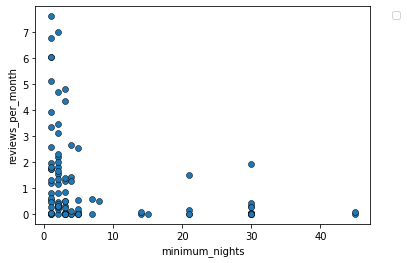

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
#x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
#y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
df = X_train[['minimum_nights', 'reviews_per_month']].head(100)
print(df)


h = .02 
print('training')
knn_model_distance = KNeighborsClassifier(weights='distance')
knn_model_distance.fit(df, y_train.head(100))


print('2')
# Plot the decision boundary.
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = df['minimum_nights'].min() - 1, df['minimum_nights'].max() + 1
y_min, y_max = df['reviews_per_month'].min() - 1, df['reviews_per_month'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print('predicting')
Z = knn_model_distance.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# create colormap for the contour plot
cmap_light = ListedColormap(list(sns.color_palette('pastel', n_colors=3)))

print('plotting')
# create plot
fig, ax = plt.subplots()

# add data points
sns.scatterplot(data=df, x='minimum_nights', y='reviews_per_month', ax=ax, edgecolor='k')

# add decision boundary countour map
#ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# legend
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



#### 4. Use the sklearn.metrics.accuracy_score method to compare the accuracy of the several values of k, k=5, 11, and 15, and compare your original and your normalized (min-max scaled and standardized) datasets. Accuracy score can be computed by comparing the test set values and the predicted values, e.g.,


In [31]:
training_datasets = {    
  'original': X_train, 
  'minmax normalized': X_train_minmax, 
  'standardized': X_train_standard
  }

testing_datasets = {
  'original': X_test, 
  'minmax normalized': X_test_minmax, 
  'standardized': X_test_standard
}

for model in models:
  for dataset_name, dataset_data in training_datasets.items():
    model.fit(dataset_data, y_train)
    #y_hat = model.predict(X_test)
    y_hat = model.predict(testing_datasets[dataset_name])
    
    accuracy = round(accuracy_score(y_test, y_hat), 2)
    print(f"Accuracy for {str(model)} model and {str(dataset_name)} dataset is {accuracy}")

Accuracy for KNeighborsClassifier() model and original dataset is 0.5
Accuracy for KNeighborsClassifier() model and minmax normalized dataset is 0.54
Accuracy for KNeighborsClassifier() model and standardized dataset is 0.53
Accuracy for KNeighborsClassifier(n_neighbors=11) model and original dataset is 0.52
Accuracy for KNeighborsClassifier(n_neighbors=11) model and minmax normalized dataset is 0.55
Accuracy for KNeighborsClassifier(n_neighbors=11) model and standardized dataset is 0.55
Accuracy for KNeighborsClassifier(n_neighbors=15) model and original dataset is 0.53
Accuracy for KNeighborsClassifier(n_neighbors=15) model and minmax normalized dataset is 0.56
Accuracy for KNeighborsClassifier(n_neighbors=15) model and standardized dataset is 0.56
Accuracy for KNeighborsClassifier(weights='distance') model and original dataset is 0.49
Accuracy for KNeighborsClassifier(weights='distance') model and minmax normalized dataset is 0.53
Accuracy for KNeighborsClassifier(weights='distance'

In [38]:
knn_model_k15 = KNeighborsClassifier(n_neighbors=15)
knn_model_k15.fit(X_train_minmax, y_train)
y_hat = knn_model_k15.predict(X_test_minmax)


print(classification_report(
          y_test, 
          y_hat,
          labels=np.array(labels)
        ))



              precision    recall  f1-score   support

         <50       0.58      0.36      0.45      1365
      50-100       0.58      0.69      0.63      3397
     100-200       0.55      0.73      0.63      3342
     200-300       0.40      0.17      0.24       993
     300-400       0.34      0.06      0.10       335
     400-500       0.20      0.01      0.01       133
     500-600       0.00      0.00      0.00        62
     600-700       0.60      0.15      0.24        40
     700-800       0.27      0.12      0.17        32
     800-900       0.00      0.00      0.00        10
    900-1000       0.00      0.00      0.00        16
     over 1k       0.00      0.00      0.00        52

    accuracy                           0.56      9777
   macro avg       0.29      0.19      0.21      9777
weighted avg       0.53      0.56      0.53      9777



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 5. Test the performance of each k-NN classifier using other evaluation metrics (precision, recall and F1 scores) and see if there is any difference if you chose different metrics.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

for model in models:
  for dataset_name, dataset_data in training_datasets.items():
    model.fit(dataset_data, y_train)
    #y_hat = model.predict(X_test)
    y_hat = model.predict(testing_datasets[dataset_name])

    precision = round(precision_score(y_test, y_hat, average='weighted', zero_division=0), 2)
    recall = round(recall_score(y_test, y_hat, average='weighted', zero_division=0), 2)
    f1 = round(f1_score(y_test, y_hat, average='weighted', zero_division=0), 2)

    print(f"Precision for {str(model)} model and {str(dataset_name)} dataset is {precision}, recall: {recall}, f1: {f1}")

Precision for KNeighborsClassifier() model and original dataset is 0.49, recall: 0.51, f1: 0.49
Precision for KNeighborsClassifier() model and minmax normalized dataset is 0.51, recall: 0.54, f1: 0.52
Precision for KNeighborsClassifier() model and standardized dataset is 0.52, recall: 0.54, f1: 0.52
Precision for KNeighborsClassifier(n_neighbors=11) model and original dataset is 0.5, recall: 0.52, f1: 0.49
Precision for KNeighborsClassifier(n_neighbors=11) model and minmax normalized dataset is 0.52, recall: 0.55, f1: 0.52
Precision for KNeighborsClassifier(n_neighbors=11) model and standardized dataset is 0.54, recall: 0.56, f1: 0.53
Precision for KNeighborsClassifier(n_neighbors=15) model and original dataset is 0.5, recall: 0.53, f1: 0.49
Precision for KNeighborsClassifier(n_neighbors=15) model and minmax normalized dataset is 0.54, recall: 0.56, f1: 0.53
Precision for KNeighborsClassifier(n_neighbors=15) model and standardized dataset is 0.55, recall: 0.56, f1: 0.53
Precision for K

In [ ]:
knn_model_k15 = KNeighborsClassifier(n_neighbors=15)
knn_model_k15.fit(X_train_standard, y_train)
y_hat = knn_model_k15.predict(X_test_standard)
print(classification_report(
          y_test, 
          y_hat,
          labels=np.array(labels)
        )
    )

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         <50       0.56      0.35      0.43      1307
      50-100       0.59      0.67      0.63      3494
     100-200       0.54      0.74      0.62      3311
     200-300       0.38      0.16      0.22      1015
     300-400       0.44      0.07      0.12       325
     400-500       0.18      0.02      0.03       126
     500-600       0.00      0.00      0.00        51
     600-700       1.00      0.05      0.10        39
     700-800       0.38      0.19      0.26        26
     800-900       0.00      0.00      0.00        13
    900-1000       0.00      0.00      0.00        24
     over 1k       0.00      0.00      0.00        46

    accuracy                           0.55      9777
   macro avg       0.34      0.19      0.20      9777
weighted avg       0.53      0.55      0.52      9777



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### 6. Imagine that you have another classifier that always predicts the most common label, do a baseline comparison for your ML models

In [ ]:
# most common label

mode_value = y_test.mode().item()
mode_value_count = y_test[y_test == mode_value].shape[0]

print("baseline accuracy: ", round((mode_value_count/y_test.shape[0]), 2))

baseline accuracy:  0.36


#### 7. Generate a simple plot of the test and training learning curve for each k-NN and check if you have a low/high bias or low/high variance learning. We can use the function learning_curve to generate the values that are required to plot such a learning curve (number of samples that have been used, the average scores on the training sets and the average scores on the validation sets)

In [ ]:
from sklearn.model_selection import learning_curve

# min is k value which is 5 and max is the max 
# values in our training set
# we will also include a few numebrs in between
train_sizes = [5, 1000, 5000, 10000, 20000, 31284]

estimator = knn_model_distance

# learning curve to get training and test scores along with train sizes

train_sizes, train_scores, test_scores = \
learning_curve(estimator=estimator, 
               X=X_train_standard, 
               y=y_train,
               train_sizes=train_sizes,
               cv=5,
               scoring='accuracy')

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Testing error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title("Learning curves for KNeighborsClassifier(weights='distance') and standardized dataset", fontsize = 18, y = 1.03)
plt.legend()

This seems to be a case of **low bias** and **high variance**. Adding more trainign instances are likely to increase the accuracy. Let's also test an original dataset and KNeighborsClassifier(n_neighbors=15)

In [ ]:
# min is k, which is 15 and max is the max values in our training set
# we will also include a few numebrs in between
train_sizes = [15, 1000, 5000, 10000, 20000, 31284]

estimator = knn_model_k15

# learning curve to get training and test scores along with train sizes

train_sizes1, train_scores1, test_scores1 = \
learning_curve(estimator=estimator, 
               X=X_train, 
               y=y_train,
               train_sizes=train_sizes,
               cv=5,
               scoring='accuracy')


KeyboardInterrupt: ignored

In [ ]:
train_scores_mean1 = train_scores1.mean(axis = 1)
validation_scores_mean1 = test_scores1.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean1, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean1, label = 'Testing error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title("Learning curves for KNeighborsClassifier(15) and original dataset", fontsize = 18, y = 1.03)
plt.legend()

In this case, it appears we have a **high bias** and **low variance**. And again, adding more datapoinst might increase the accuracy. So giving more weight to the points which are nearby seemed to have decreased our bias.

### EXTRA

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train[['latitude','longitude']], y_train)
y_hat = neigh.predict(X_test[['latitude','longitude']])

print(round(accuracy_score(y_test, y_hat), 2))

0.45


In [ ]:
columns = ['latitude','longitude', 'type_entire_home/apt',	'type_private_room',	'type_shared_room', 'long_term_rent']
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train_standard[columns], y_train)
y_hat = neigh.predict(X_test_standard[columns])

print(round(accuracy_score(y_test, y_hat), 2))

0.56


In [ ]:
#columns = ['latitude','longitude', 'type_entire_home/apt',	'type_private_room',	'type_shared_room', 'long_term_rent']
neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(X_train_standard, y_train)
y_hat = neigh.predict(X_test_standard)

print(round(accuracy_score(y_test, y_hat), 2))

0.56
